In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
from sklearn import preprocessing
import pickle
%matplotlib inline

## Face detection with Haar cascades

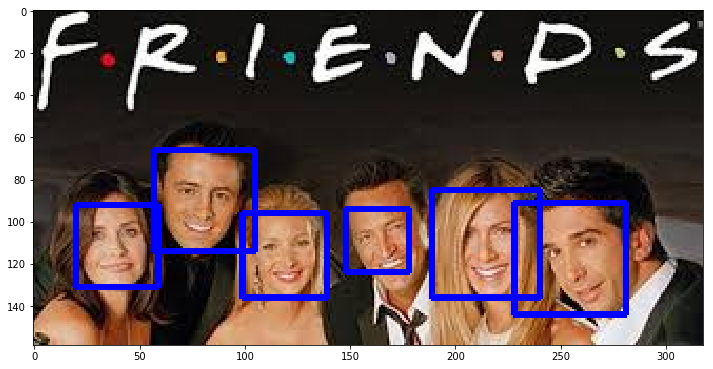

In [32]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('test_img.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    

##Display the output
##BGR to RGB
IMAGE_SIZE = (12, 8)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

##

# cv2.imshow('img', img)
# key = cv2.waitKey()


## Gender, age and ethinicity detection with CNN

In [49]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']

A caffe model has 2 associated files,
1 .prototxt — The definition of CNN goes in here. This file defines the layers in the neural network, each layer’s inputs, outputs and functionality.
2 .caffemodel — This contains the information of the trained neural network (trained model).

In [47]:
def load_caffe_models():
    age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
    gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')
    return(age_net, gender_net)



filename = 'race_classification_model_mlpclass_191008.sav'
race_classification = pickle.load(open(filename, 'rb'))
# result = race_classification.predict(face_data[6].reshape(1, -1))

label_table = ['african', 'asian', 'caucasian']
lb = preprocessing.LabelBinarizer()
lb.fit(label_table)
#lb.inverse_transform(result)[0][0]

def detect_race(face):
    face = cv2.resize(face, (128,128), interpolation = cv2.INTER_AREA)
    result = race_classification.predict(face.reshape(1, -1))
    return lb.inverse_transform(result)[0] 


#function to detect face
def detect_test(img):
    #convert the test image to gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #load OpenCV face detector
    face_cas = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cas.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4);
    #if no faces are detected then return image
    if (len(faces) == 0):
        return None, None
    #extract the face
    
    k=[]
    
    
    for (x, y, w, h) in faces:
        k.append(img[y:y+h, h:h+w].copy())
    #return only the face part
    return k[0]

In [51]:
def webcam_gender_and_age_detector(age_net, gender_net):
    # Load the cascade
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        
    
    vc = cv2.VideoCapture(0)
#     vc = cv2.VideoCapture('test_video.mp4')  ## switch to the video 
    
    
    if vc.isOpened(): # try to get the first frame
        rval, frame = vc.read()
    else:
        rval = False
    
    while rval:
        rval, frame = vc.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray_frame, 1.15, 5)
        # Draw rectangle around the faces
        font = cv2.FONT_HERSHEY_COMPLEX_SMALL
        
        a=0
        
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            face_copy = frame[y-a:y+h+a, h-a:h+w+a].copy()
            blob = cv2.dnn.blobFromImage(face_copy, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

    #Predict Gender
            gender_net.setInput(blob)
            gender_preds = gender_net.forward()
            gender = gender_list[gender_preds[0].argmax()]
            
                        

    #Predict Age
            age_net.setInput(blob)
            age_preds = age_net.forward()
            age = age_list[age_preds[0].argmax()]
            
            
    ##Predict ethinicity (additional step)
            race = detect_race(face_copy)   ##################################Extra ##############
    
    
    
            overlay_text = "%s %s %s" % (gender, race, age)
    
            cv2.putText(frame, overlay_text, (x, y), font, 1.5, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow("webcam_gender_and_age_detector", frame)
        key = cv2.waitKey(20)
        if key == 27: # exit on ESC
            vc.release()
            break   
    cv2.destroyWindow("webcam_gender_and_age_detector")
    
    
age_net, gender_net = load_caffe_models()
webcam_gender_and_age_detector(age_net, gender_net)

In [144]:
# age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
# gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')
# # Load the cascade
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# # Read the input image
# img = cv2.imread('test_img.jpg')
# # Convert into grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Detect faces
# faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# # Draw rectangle around the faces
# font = cv2.FONT_HERSHEY_COMPLEX_SMALL
# for (x, y, w, h) in faces:
#     cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#     face_copy = img[y:y+h, h:h+w].copy()
#     blob = cv2.dnn.blobFromImage(face_copy, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

# #Predict Gender
#     gender_net.setInput(blob)
#     gender_preds = gender_net.forward()
#     gender = gender_list[gender_preds[0].argmax()]
#     print("Gender : " + gender)
# #Predict Age
#     age_net.setInput(blob)
#     age_preds = age_net.forward()
#     age = age_list[age_preds[0].argmax()]
#     print("Age Range: " + age)
#     overlay_text = "%s %s" % (gender, age)
    
#     cv2.putText(img, overlay_text, (x, y), font, 0.4, (255, 255, 255), 1, cv2.LINE_AA)
# # cv2.imshow('frame', img)  
    

# # ##Display the output
# # ##BGR to RGB
# IMAGE_SIZE = (12, 8)
# plt.figure(figsize=IMAGE_SIZE)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

## Add one more classification of ethinicity

In [4]:
import os

#function to detect face
def detect_face(img):
    #convert the test image to gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #load OpenCV face detector
    face_cas = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cas.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4);
    #if no faces are detected then return image
    if (len(faces) == 0):
        return None, None
    #extract the face
    
    rect=[]
    face=[]
    
    
    for (x, y, w, h) in faces:
        rect.append((x, y, w, h))
        face.append(img[y: y+w, x: x+h])
        
    #return only the face part
    return face[0], rect[0]

In [5]:
#this function will read all persons' training images, detect face #from each image
#and will return two lists of exactly same size, one list
def prepare_training_data(data_folder_path):
    
#------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    for dir_name in dirs:
    #our subject directories start with letter 's' so
    #ignore any non-relevant directories if any
        if not dir_name.startswith("s_"):
            continue;
    
#------STEP-2--------
    #extract label number of subject from dir_name
    #format of dir name = slabel
    #, so removing letter 's' from dir_name will give us label
        label = str(dir_name.replace("s_", ""))
    #build path of directory containin images for current subject subject
    #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
    #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
    
#------STEP-3--------
    #go through each image name, read image,
    #detect face and add face to list of faces
        for image_name in subject_images_names:
            
    #build image path
    #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name
    #read image
            image = cv2.imread(image_path)
    #display an image window to show the image
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
    #detect face
            face, rect = detect_face(image)
    
#------STEP-4--------
    #we will ignore faces that are not detected
            if face is not None:
    #add face to list of faces
                faces.append(face)
    #add label for this face
                labels.append(label)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    return faces, labels

In [7]:
path = r'C:\Users\Jianhui.ben\Documents\Python_Scripts\gender, age and race detection'
face_list, label_list = prepare_training_data(path)

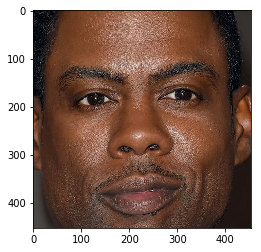

In [8]:
plt.imshow(cv2.cvtColor(face_list[0], cv2.COLOR_BGR2RGB)) 

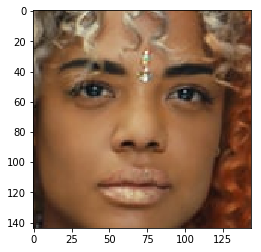

In [9]:
plt.imshow(cv2.cvtColor(face_list[1], cv2.COLOR_BGR2RGB)) 

In [12]:
## delete the images with face resolution smaller than 100*100
delete=[]
for i in range(len(face_list)): 
    if face_list[i].shape[1]<100:
        delete.append(i)
for index in sorted(delete, reverse=True):
    del face_list[index]
    del label_list[index]

In [13]:
print(label_list.count('asian'))
print(label_list.count('african'))
print(label_list.count('caucasian'))


48
39
50


In [14]:
face_list[0].shape

(453, 453, 3)

In [70]:
cv2.resize(face_list[0], (128,128), interpolation = cv2.INTER_AREA)

array([[17, 23, 16, ..., 49, 49, 49],
       [10, 11, 20, ..., 49, 49, 49],
       [32, 19,  6, ..., 49, 49, 49],
       ...,
       [74, 73, 72, ..., 23, 22, 23],
       [74, 74, 73, ..., 23, 22, 23],
       [74, 74, 74, ..., 23, 23, 24]], dtype=uint8)

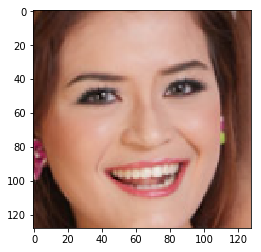

In [20]:
plt.imshow(cv2.cvtColor(cv2.resize(face_list[66], (128,128), interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) 

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import seaborn as sns

In [21]:
##resize all the faces into 128 *128 for further training of classification model
for i in range(len(face_list)):
    face_list[i]=cv2.resize(face_list[i], (128,128), interpolation = cv2.INTER_AREA)

In [22]:
###array(['african', 'asian', 'causian']
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(label_list)
transformed_label= lb.transform(label_list)    
    

In [23]:
##MLP classifier only read 2D array as inputs
face_data=[]
for i in range(len(face_list)):
    face_data.append(face_list[i].flatten())

In [24]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(128, 128),max_iter = 5000, verbose=True, tol=1e-4, activation='relu')
clf.fit(face_data,transformed_label)

Iteration 1, loss = 23.02599242
Iteration 2, loss = 46.05184501
Iteration 3, loss = 29.91694469
Iteration 4, loss = 29.24465976
Iteration 5, loss = 23.19407404
Iteration 6, loss = 22.11329140
Iteration 7, loss = 30.99923422
Iteration 8, loss = 30.99282558
Iteration 9, loss = 22.31539187
Iteration 10, loss = 28.10571181
Iteration 11, loss = 25.38339756
Iteration 12, loss = 27.43579469
Iteration 13, loss = 26.89167360
Iteration 14, loss = 23.07350972
Iteration 15, loss = 24.43003922
Iteration 16, loss = 21.77419917
Iteration 17, loss = 30.46493845
Iteration 18, loss = 26.72812397
Iteration 19, loss = 19.89745537
Iteration 20, loss = 18.19316601
Iteration 21, loss = 26.89168291
Iteration 22, loss = 24.79204982
Iteration 23, loss = 21.43500252
Iteration 24, loss = 22.24856069
Iteration 25, loss = 24.62373406
Iteration 26, loss = 22.72810481
Iteration 27, loss = 16.64058364
Iteration 28, loss = 17.61653415
Iteration 29, loss = 17.67396049
Iteration 30, loss = 16.80955751
Iteration 31, loss 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 128), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [30]:
clf.predict(face_data[120].reshape(1, -1))  ## for the single test img

array([[0, 0, 1]])

In [28]:
array_pred=clf.predict(face_data[6].reshape(1, -1))

lb.inverse_transform(array_pred)[0] 


'african'

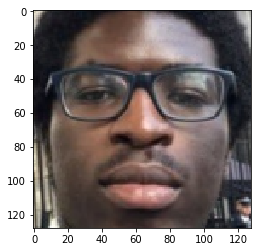

In [31]:
plt.imshow(cv2.cvtColor(cv2.resize(face_list[6], (128,128), interpolation = cv2.INTER_AREA), cv2.COLOR_BGR2RGB)) 

In [32]:
# ## save the clf model
# import pickle
# filename = 'race_classification_model_mlpclass_191008.sav'
# pickle.dump(clf, open(filename, 'wb'))

In [39]:
from sklearn import preprocessing
import pickle
filename = 'race_classification_model_mlpclass_191008.sav'
race_classification = pickle.load(open(filename, 'rb'))
# result = race_classification.predict(face_data[6].reshape(1, -1))

label_table = ['african', 'asian', 'caucasian']
lb = preprocessing.LabelBinarizer()
lb.fit(label_table)
#lb.inverse_transform(result)[0][0]

def detect_race(face):
    face = cv2.resize(face, (128,128), interpolation = cv2.INTER_AREA)
    result = race_classification.predict(face.reshape(1, -1))
    return lb.inverse_transform(result)[0] 


#function to detect face
def detect_test(img):
    #convert the test image to gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #load OpenCV face detector
    face_cas = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cas.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4);
    #if no faces are detected then return image
    if (len(faces) == 0):
        return None, None
    #extract the face
    
    k=[]
    
    
    for (x, y, w, h) in faces:
        k.append(img[y:y+h, h:h+w].copy())
    #return only the face part
    return k[0]

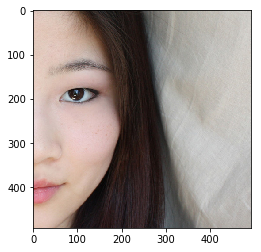

In [44]:
mm=detect_test(cv2.imread('test_img.jpg'))
plt.imshow(cv2.cvtColor(mm, cv2.COLOR_BGR2RGB)) 

In [45]:
detect_race(mm)

'caucasian'